In [1]:
pip install pycaret[full]

zsh:1: no matches found: pycaret[full]
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')

In [49]:
data

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


In [42]:
data = data.drop('HLM', axis=1)
data

,id,SMILES,MLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,0.989,284.696,5,1,5,0.989,91.51


In [50]:
from pycaret.regression import *

s = RegressionExperiment()
s.setup(data=data,
                     target='MLM',
                     train_size= 0.8,
                     session_id=42,
                     fold=5)

setup(data=data,
                     target='MLM',
                     train_size= 0.8,
                     session_id=42,
                     fold=5)

,Description,Value
0,Session id,42
1,Target,MLM
2,Target type,Regression
3,Original data shape,"(3498, 11)"
4,Transformed data shape,"(3498, 11)"
5,Transformed train set shape,"(2798, 11)"
6,Transformed test set shape,"(700, 11)"
7,Numeric features,8
8,Categorical features,2
9,Rows with missing values,0.1%


,Description,Value
0,Session id,42
1,Target,MLM
2,Target type,Regression
3,Original data shape,"(3498, 11)"
4,Transformed data shape,"(3498, 11)"
5,Transformed train set shape,"(2798, 11)"
6,Transformed test set shape,"(700, 11)"
7,Numeric features,8
8,Categorical features,2
9,Rows with missing values,0.1%


In [51]:

best_model_MLM = compare_models()

best_model_MLM = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,18.8751,626.1932,25.0165,0.4993,1.1960,22.4368,0.0280
knn,K Neighbors Regressor,21.1384,760.7755,27.5760,0.3923,1.2652,25.4464,0.0320
huber,Huber Regressor,22.9072,774.2625,27.7925,0.3815,1.5019,52.9444,0.0320
en,Elastic Net,31.2241,1217.0083,34.8806,0.0283,1.7817,85.5765,0.0280
llar,Lasso Least Angle Regression,31.6329,1245.4576,35.2857,0.0057,1.7924,85.0732,0.0300
lasso,Lasso Regression,31.6342,1245.5610,35.2872,0.0056,1.7925,85.0784,0.1980
et,Extra Trees Regressor,31.7174,1254.3760,35.4119,-0.0015,1.7937,86.6968,0.0440
rf,Random Forest Regressor,31.7657,1256.9699,35.4480,-0.0035,1.7954,85.8288,0.0400
dt,Decision Tree Regressor,31.7867,1257.7521,35.4593,-0.0041,1.7963,85.6948,0.0320
ada,AdaBoost Regressor,31.7244,1257.6945,35.4586,-0.0041,1.7900,84.5347,0.0340


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,18.8751,626.1932,25.0165,0.4993,1.1960,22.4368,0.0280
knn,K Neighbors Regressor,21.1384,760.7755,27.5760,0.3923,1.2652,25.4464,0.0320
huber,Huber Regressor,22.9072,774.2625,27.7925,0.3815,1.5019,52.9444,0.0340
en,Elastic Net,31.2241,1217.0083,34.8806,0.0283,1.7817,85.5765,0.1960
llar,Lasso Least Angle Regression,31.6329,1245.4576,35.2857,0.0057,1.7924,85.0732,0.0280
lasso,Lasso Regression,31.6342,1245.5610,35.2872,0.0056,1.7925,85.0784,0.0280
et,Extra Trees Regressor,31.7174,1254.3760,35.4119,-0.0015,1.7937,86.6968,0.0420
rf,Random Forest Regressor,31.7657,1256.9699,35.4480,-0.0035,1.7954,85.8288,0.0400
dt,Decision Tree Regressor,31.7867,1257.7521,35.4593,-0.0041,1.7963,85.6948,0.0320
ada,AdaBoost Regressor,31.7244,1257.6945,35.4586,-0.0041,1.7900,84.5347,0.0300


In [45]:
print(best_model_MLM)

HuberRegressor()


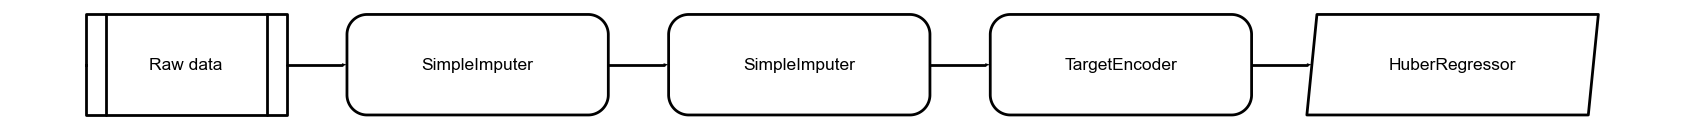

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
evaluate_model(best_model_MLM)

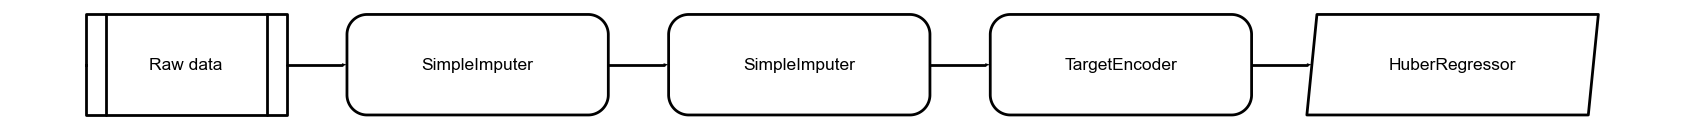

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [47]:
s.evaluate_model(best_model_MLM)

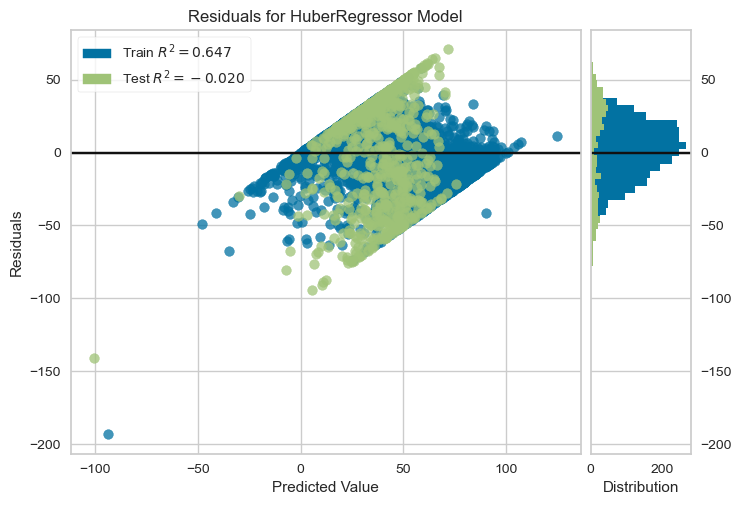

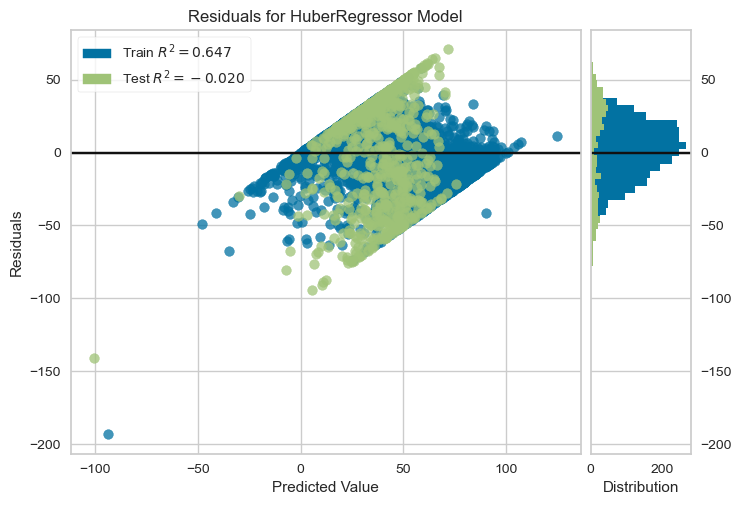

In [35]:
# functional API
plot_model(best_model_MLM, plot = 'residuals')

# OOP API
s.plot_model(best_model_MLM, plot = 'residuals')

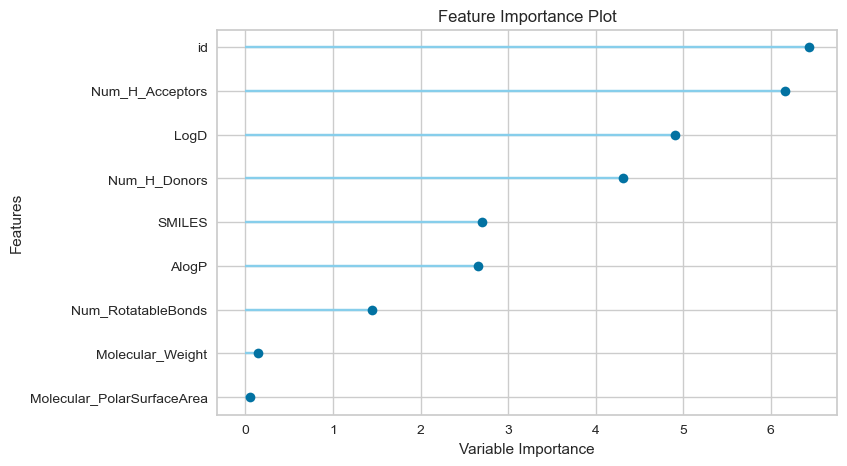

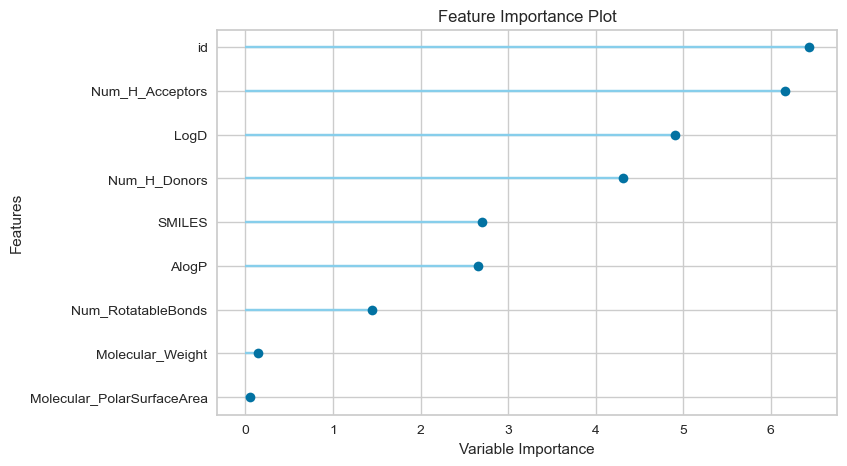

In [36]:
# functional API
plot_model(best_model_MLM, plot = 'feature')

# OOP API
s.plot_model(best_model_MLM, plot = 'feature')

In [37]:
# functional API
predict_model(best_model_MLM)

# OOP API
s.predict_model(best_model_MLM)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,32.4115,1370.9830,37.0268,-0.0200,1.8698,72.6670


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,32.4115,1370.9830,37.0268,-0.0200,1.8698,72.6670


,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,MLM,prediction_label
1650,TRAIN_1650,COC(=O)c1ccccc1C1CCN(C(=O)OC(C)(C)C)CC1,3.210,319.394989,4,0,5,3.210,55.840000,4.210000,48.114472
2456,TRAIN_2456,CN(C(=O)CN1C(=O)COc2cc(Cl)c(Cl)cc21)C(CN1CCCC1...,3.473,540.440979,6,0,7,3.200,78.870003,99.989998,25.860400
2232,TRAIN_2232,CC(=O)c1c(-c2cccc3ccccc23)nc2n(CCN3CCCCC3)c3cc...,5.647,436.548004,3,0,5,4.290,42.540001,0.030000,27.136486
1945,TRAIN_1945,Cc1cccc(C)c1C1=NOC(C)(CS(=O)(=O)C2=NOC(C)(C)C2)C1,2.821,364.459015,6,0,4,2.821,85.690002,0.110000,54.958000
309,TRAIN_0309,CN1CCC(NS(=O)(=O)c2cc(Cl)ccc2Cl)CC1,2.180,323.239014,3,1,3,0.963,57.790001,98.839996,48.195318
...,...,...,...,...,...,...,...,...,...,...,...
3126,TRAIN_3126,Cc1cccn2c(=O)c(/C=N/O)c(NCc3ccco3)nc12,0.864,298.296997,4,2,4,0.864,90.430000,99.900002,47.575015
744,TRAIN_0744,CC(C)c1noc(CCCn2ccc(-c3ccc(Br)cc3)n2)n1,4.376,375.263000,3,0,6,4.376,56.740002,99.989998,29.907486
631,TRAIN_0631,CCOC(=O)c1c(=O)n(-c2ccc(C)cc2)nc2ccccc12,2.936,308.330994,4,0,4,2.936,58.970001,0.100000,51.600350
1557,TRAIN_1557,Cc1nc(O)[nH]c(=O)c1S(=O)(=O)NCC1CCCO1,-0.842,289.308014,6,3,4,-0.734,125.470001,92.930000,58.515574


In [16]:
# functional API
predictions = predict_model(best_model_MLM, data=data)
predictions.head()

# OOP API
predictions = s.predict_model(best_model_MLM, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,18.9597,637.6709,25.2521,0.4994,1.2072,21.7563


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,18.9597,637.6709,25.2521,0.4994,1.2072,21.7563


,id,SMILES,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,MLM,prediction_label
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,50.680000,3.259,400.494995,5,2,8,3.259,117.370003,26.010000,35.495990
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,50.590000,2.169,301.407013,2,1,2,2.172,73.470001,29.270000,35.433401
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,80.891998,1.593,297.358002,5,0,3,1.585,62.450001,5.586000,56.506548
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,2.000000,4.771,494.652008,6,0,5,3.475,92.599998,5.710000,1.642090
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,99.989998,2.335,268.309998,3,0,1,2.337,42.430000,93.269997,69.788014


In [18]:
# functional API
save_model(best_model_MLM, 'my_best_MLM_pipeline')

# OOP API
s.save_model(best_model_MLM, 'my_best_MLM_pipeline')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/3m/knb96f9s4xg2t2gcrl96r6jh0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['HLM', 'AlogP', 'Molecular_Weight',
                                              'Num_H_Acceptors', 'Num_H_Donors',
                                              'Num_RotatableBonds', 'LogD',
                                              'Molecular_PolarSurfaceArea'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['id', 'SMILES'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['id', 'SMILES'],
                                     transformer=TargetEncoder(cols=['id',
                                                                     'SMILES'],
                                 

In [52]:
reg_test_HLM = setup(data=data,
                     target='HLM',
                     train_size= 0.8,
                     session_id=43,
                     fold=5)

setup(data=data,
                     target='HLM',
                     train_size= 0.8,
                     session_id=43,
                     fold=5)

,Description,Value
0,Session id,43
1,Target,HLM
2,Target type,Regression
3,Original data shape,"(3498, 11)"
4,Transformed data shape,"(3498, 11)"
5,Transformed train set shape,"(2798, 11)"
6,Transformed test set shape,"(700, 11)"
7,Numeric features,8
8,Categorical features,2
9,Rows with missing values,0.1%


,Description,Value
0,Session id,43
1,Target,HLM
2,Target type,Regression
3,Original data shape,"(3498, 11)"
4,Transformed data shape,"(3498, 11)"
5,Transformed train set shape,"(2798, 11)"
6,Transformed test set shape,"(700, 11)"
7,Numeric features,8
8,Categorical features,2
9,Rows with missing values,0.1%


In [53]:
best_model_HLM = compare_models()

best_model_HLM = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,20.3697,660.8207,25.7050,0.4936,1.1893,24.1733,0.0280
huber,Huber Regressor,22.5027,736.8203,27.1145,0.4356,1.2443,30.8465,0.0320
knn,K Neighbors Regressor,22.3355,769.1980,27.7115,0.4110,1.2527,30.4074,0.0300
en,Elastic Net,31.9040,1268.2257,35.6103,0.0284,1.4506,46.9186,0.0280
lasso,Lasso Regression,32.3346,1299.5775,36.0482,0.0044,1.4588,47.2382,0.1920
llar,Lasso Least Angle Regression,32.3333,1299.4683,36.0466,0.0044,1.4588,47.2363,0.0280
et,Extra Trees Regressor,32.4044,1306.8790,36.1491,-0.0012,1.4592,47.5866,0.0420
ada,AdaBoost Regressor,32.4535,1310.0202,36.1928,-0.0037,1.4623,47.4144,0.0320
rf,Random Forest Regressor,32.4832,1311.3863,36.2115,-0.0047,1.4610,47.4234,0.0440
dt,Decision Tree Regressor,32.4868,1311.5666,36.2138,-0.0048,1.4608,47.3965,0.0300


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,18.8751,626.1932,25.0165,0.4993,1.1960,22.4368,0.0280
knn,K Neighbors Regressor,21.1384,760.7755,27.5760,0.3923,1.2652,25.4464,0.0320
huber,Huber Regressor,22.9072,774.2625,27.7925,0.3815,1.5019,52.9444,0.0340
en,Elastic Net,31.2241,1217.0083,34.8806,0.0283,1.7817,85.5765,0.0280
llar,Lasso Least Angle Regression,31.6329,1245.4576,35.2857,0.0057,1.7924,85.0732,0.2060
lasso,Lasso Regression,31.6342,1245.5610,35.2872,0.0056,1.7925,85.0784,0.1940
et,Extra Trees Regressor,31.7174,1254.3760,35.4119,-0.0015,1.7937,86.6968,0.0440
rf,Random Forest Regressor,31.7657,1256.9699,35.4480,-0.0035,1.7954,85.8288,0.0400
dt,Decision Tree Regressor,31.7867,1257.7521,35.4593,-0.0041,1.7963,85.6948,0.0360
ada,AdaBoost Regressor,31.7244,1257.6945,35.4586,-0.0041,1.7900,84.5347,0.0300


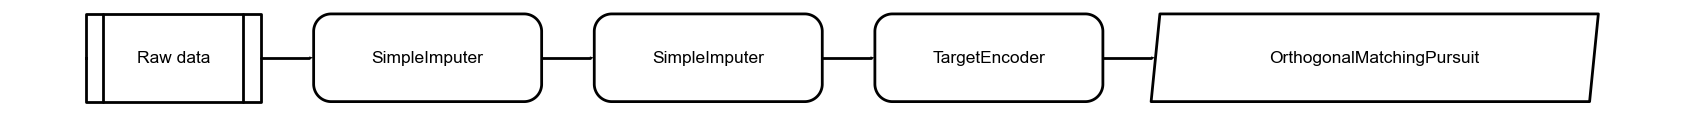

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
evaluate_model(best_model_HLM)